In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.sample(5)

,customer_id,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
30183,30184,26,Female,43,2,3,7,Basic,Annual,679,30,0
7585,7586,65,Female,52,1,3,17,Premium,Annual,113,1,1
26732,26733,55,Male,28,15,6,12,Basic,Annual,699,26,0
58369,58370,24,Female,28,28,6,17,Basic,Monthly,573,15,1
2857,2858,39,Female,52,10,8,4,Standard,Annual,846,3,0


In [4]:
df.describe

<bound method NDFrame.describe of        customer_id  age  gender  tenure  usage_frequency  support_calls  \
0                1   22  Female      25               14              4   
1                2   41  Female      28               28              7   
2                3   47    Male      27               10              2   
3                4   35    Male       9               12              5   
4                5   53  Female      58               24              9   
...            ...  ...     ...     ...              ...            ...   
64369        64370   45  Female      33               12              6   
64370        64371   37    Male       6                1              5   
64371        64372   25    Male      39               14              8   
64372        64373   50  Female      18               19              7   
64373        64374   52  Female      45               15              9   

       payment_delay subscription_type contract_length  total_spe

In [5]:
df.isnull().sum()

customer_id          0
age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
churn                0
dtype: int64

In [6]:
df.dtypes

customer_id           int64
age                   int64
gender               object
tenure                int64
usage_frequency       int64
support_calls         int64
payment_delay         int64
subscription_type    object
contract_length      object
total_spend           int64
last_interaction      int64
churn                 int64
dtype: object

In [7]:
df['gender'].unique()
df['subscription_type'].unique()
df['contract_length'].unique()
df['churn'].unique()

array([1, 0], dtype=int64)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,customer_id,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


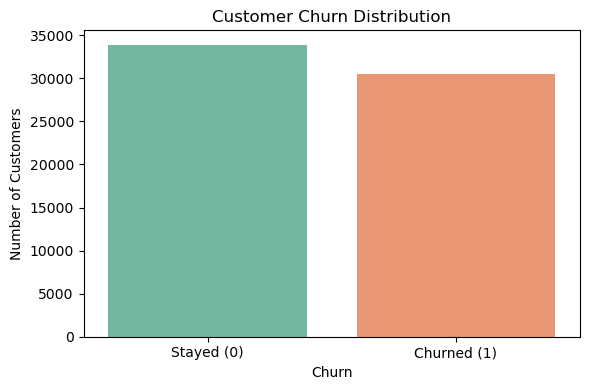

In [11]:
#Churn distribution plot

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['Stayed (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [12]:
churn_rate = df['churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate.round(2))

Churn Rate (%):
0    52.63
1    47.37
Name: churn, dtype: float64


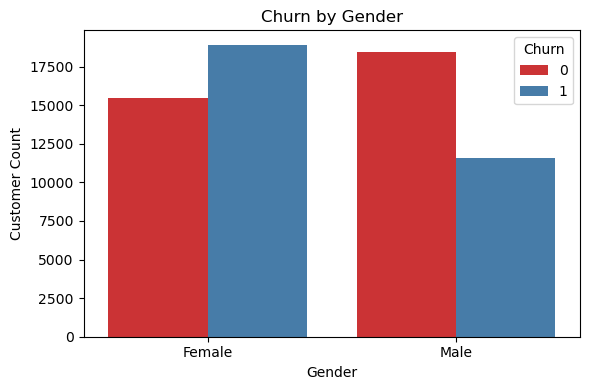

In [13]:
#Churn by Gender

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='churn', palette='Set1')
plt.title('Churn by Gender')
plt.ylabel('Customer Count')
plt.xlabel('Gender')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

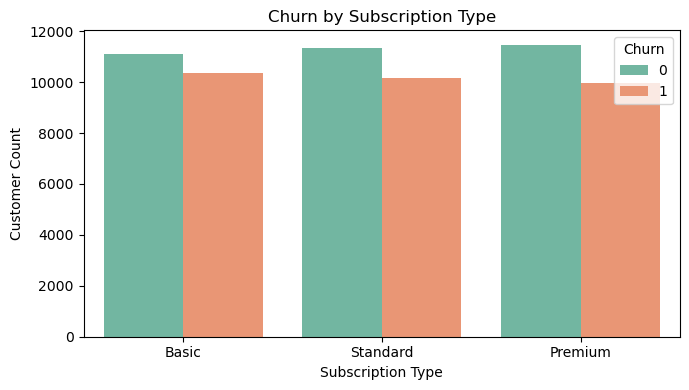

In [14]:
#Churn by Subscription type

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='subscription_type', hue='churn', palette='Set2')
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

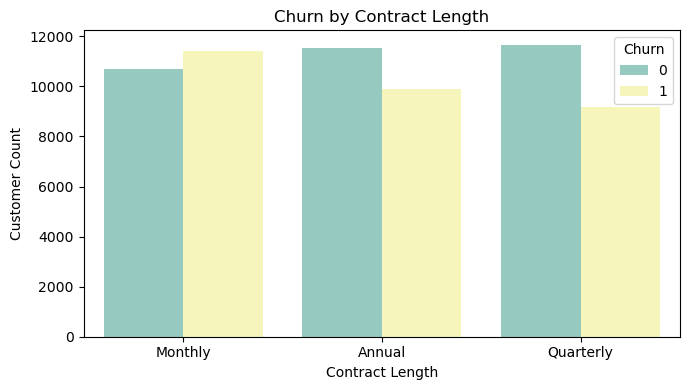

In [15]:
#Churn by Contract length

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contract_length', hue='churn', palette='Set3')
plt.title('Churn by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

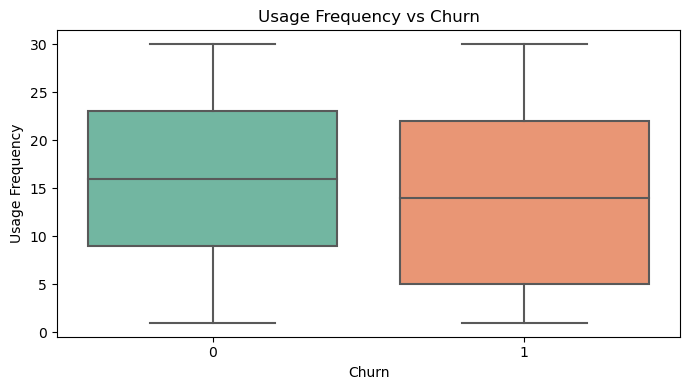

In [16]:
#Behavioral Metrics Vs Churn
#Usage Frequency
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='churn', y='usage_frequency', palette='Set2')
plt.title('Usage Frequency vs Churn')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.tight_layout()
plt.show()

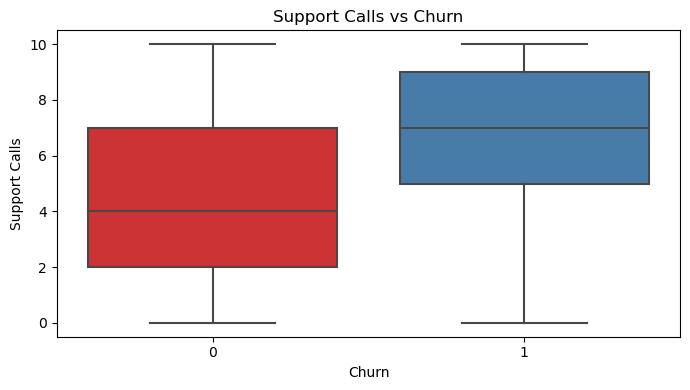

In [17]:
#Support Calls
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='churn', y='support_calls', palette='Set1')
plt.title('Support Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Support Calls')
plt.tight_layout()
plt.show()

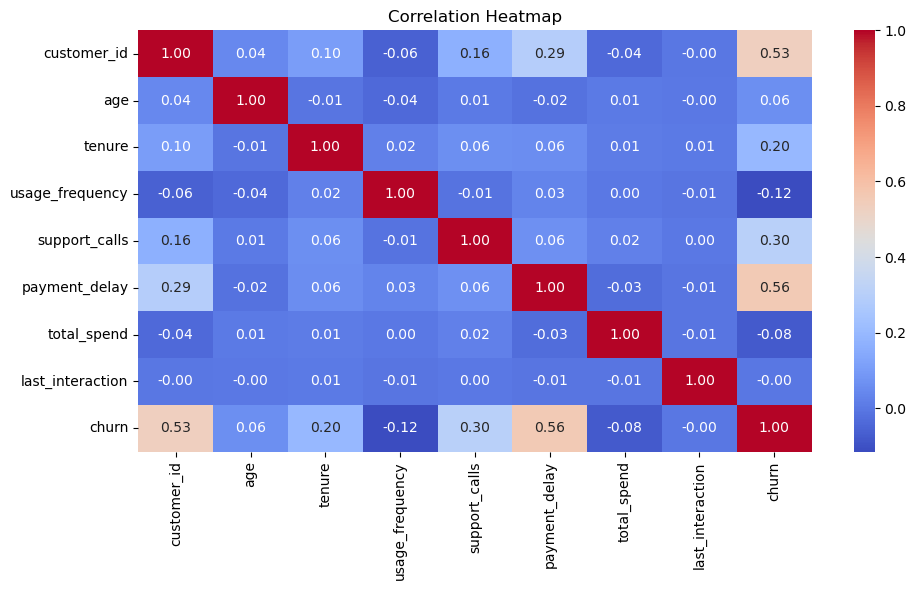

In [19]:
#Correlation heatmaps

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()